# $k$-means Clustering

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import math

## Initialization

In [2]:
dataset = load_iris()  # If you want to know more about this dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set
data = dataset['data'][:, 2:]  # We use only the petal length and width
k = 3
iterations = 20
type(data)

numpy.ndarray

## Implement the Algorithm
### Functions

In [3]:
def reassign(prototypes, data):
    indices = []
    for i, datapoint in enumerate(data):
        distances = []
        for j,prototype in enumerate(prototypes):
            distances.append(math.dist(prototype, datapoint))
        indices.append( distances.index(min(distances)))

    return indices

def reassign_sk(prototypes, data):
    indices = []
    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(prototypes)
    for i, point in  enumerate(data):
        index = neigh.kneighbors([point])[1][0][0]
        indices.append(index)

    return indices

def recalculate(prototypes: list, data: list, indices: list):
    prototypes = prototypes.copy()
    for i, _ in enumerate(prototypes):
        assigned = [point for j, point in enumerate(data) if indices[j] == i]
        prototypes[i] = np.mean(assigned, axis=0)

    return prototypes

def variance(l: list):
    avg = sum(l) / len(l)
    return sum([(n - avg) ** 2 for n in l]) / (len(l)-1)

def total_variance(prototypes, data, indices):
    dists = [math.dist(point, prototypes[indices[i]]) for i, point in enumerate(data)]
    return variance(dists)

In [8]:
# sanity check
proto = [[1,1],[2,2]]
indices =  reassign(proto, data)
new_proto = recalculate(proto, data, indices)
print(total_variance(proto, data, indices))
points = data[indices==0,:]

1.3467687253620426


### Run the Algorithm

In [5]:
np.random.seed(2)  # For reproducibility
# INITIALIZE

# random init
#lo = np.min(data, axis=0)
#hi = np.max(data, axis=0)
#cluster_prototypes = [ np.random.randint(low=lo, high=hi+1, size=2) for i in range(k)]


cluster_prototypes = []
cluster_prototypes.append([ data[np.random.randint(low = 0, high=len(data))] for i in range(k) ]) # this is not the correct format FIXME
cluster_indices = []
variances = []

#run the algorithm
for i in range(iterations):
    cluster_indices.append(reassign(cluster_prototypes[i], data))
    variances.append(total_variance(cluster_prototypes[i], data, cluster_indices[i]))
    cluster_prototypes.append(recalculate(cluster_prototypes[i], data, cluster_indices[i]))

cluster_prototypes = cluster_prototypes[:-1] # trim last unnecessary last calculation
cluster_prototypes = [np.array(i) for i in cluster_prototypes]
cluster_indices = [np.array(i) for i in cluster_indices]
variances = [np.array(i) for i in variances]


## Visualize the Result

interactive(children=(IntSlider(value=0, description='Iteration:', max=19), Output()), _dom_classes=('widget-i…

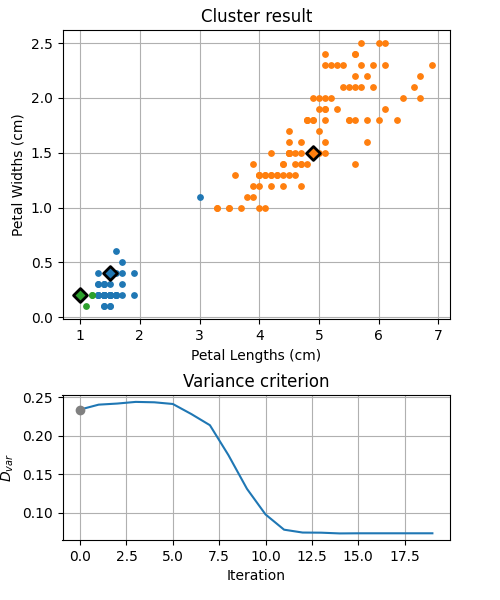

In [9]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6), gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=0.35, top=0.95, bottom=0.1)

def plot_cluster(iteration):
    indices = cluster_indices[iteration]
    prototypes = cluster_prototypes[iteration]
    
    ax1.clear()
    ax2.clear()

    # Plot each cluster
    for i in range(k):
        points = data[indices == i, :]
        ax1.scatter(points[:, 0], points[:, 1], c='C{:d}'.format(i), s=15)
        ax1.scatter(prototypes[i, 0], prototypes[i, 1], c='C{:d}'.format(i), marker='D', s=50, edgecolor='k', linewidth=2)
    
    ax1.set_xlabel('Petal Lengths (cm)')
    ax1.set_ylabel('Petal Widths (cm)')
    ax1.set_title('Cluster result')
    ax1.set_axisbelow(True)
    ax1.grid()
    
    # Variance plot
    ax2.plot(variances)
    ax2.scatter(iteration, variances[iteration], c='gray', zorder=3)
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('$D_{var}$')
    ax2.set_title('Variance criterion')
    ax2.set_axisbelow(True)
    ax2.grid()

iteration_slider = widgets.IntSlider(min=0, max=iterations-1, description='Iteration:')
interact(plot_cluster, iteration=iteration_slider);